# IPBMA_6: Projection Radiography

Resolution vs Noise

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [133]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [134]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)


250 12.0


BREAST PHANTOM

In [135]:
# OBJECT
size= 256
obj= breast_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_adipose: 2.2720000000000002
coef_breast: 3.1907639999999997
coef_soft: 4.14142


QUANTUM IMAGE. FRONTAL VIEW.

In [136]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

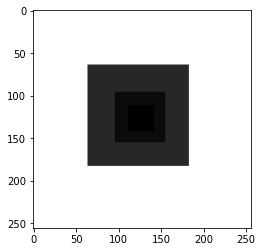

In [137]:
plt.imshow(qImage, cmap="gray")
plt.show()

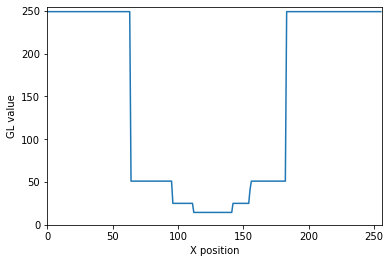

In [138]:
line = plotLineH(qImage, 128)

In [139]:
# Get Distribution of cells per Photons
nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


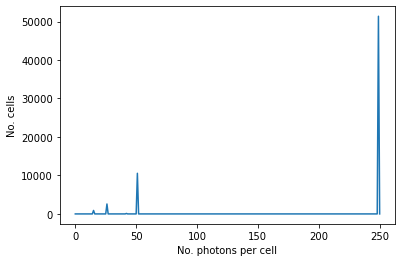

In [140]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

QUANTUM IMAGE. LATERAL VIEW.

In [141]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

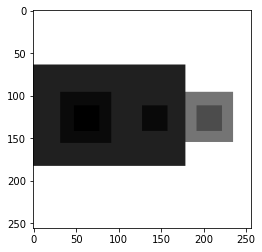

In [142]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

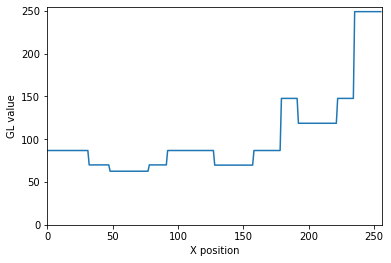

In [143]:
plotLineH(qImage, 128)

Microcalcifications Insertion

In [144]:
fName= "./coefs/coefAtenuacionCalcium.csv"
mu= getCoef(fName, eE)
sArtifact= 2

In [145]:
pos_1= [63, 125, 125]
obj_microCal= insertArtifact(obj, pos_1, sArtifact, mu)

pos_2= [143, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_2, sArtifact, mu)

pos_3= [207, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_3, sArtifact, mu)

In [146]:
qImage= interactor_PR(N0, obj_microCal, prj)

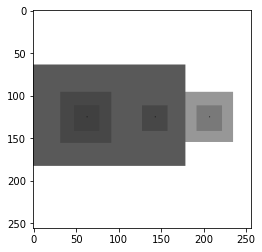

In [147]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

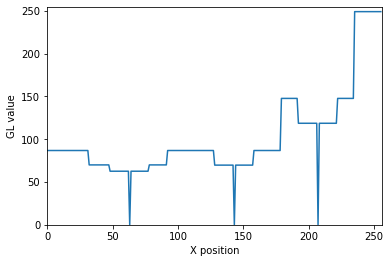

In [148]:
plotLineH(qImage, 125)

DETECTED IMAGE

In [149]:
# Detection
# dImage -> The detected image, without noise.
f= 2
dImage= detector(qImage, int(size/f), int(size/f))

Factores de escalado: 2.0, 2.0
Imagen entrada. Dimension: (256, 256)
[[248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]
 [248.88257474 248.88257474 248.88257474 248.88257474 248.88257474
  248.88257474 248.88257474 248.88257474]]


Imagen nueva. Dimension: (128, 128)
[[995.53029898 995.5

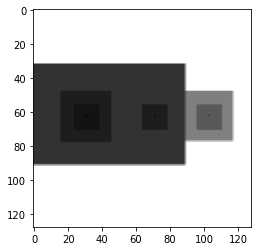

In [150]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

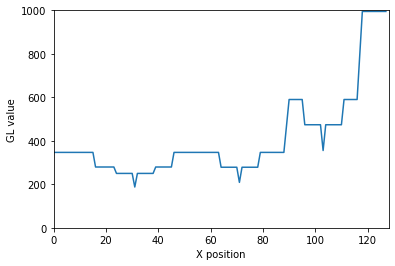

In [151]:
plotLineH(dImage, int(125/f))

In [152]:
# Detection
# dImageNoise -> The detected image, under the hypothesis of Poisson distribution.

# Al no oncluir blur adicional en la funcion del detector, es necesario un detector de tamaño menor
# para obtener un efecto similar al guión de prácticas (que desaparezca la microcalcificación).  
f = 0.35
dImageNoise= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 0.25, 0.25


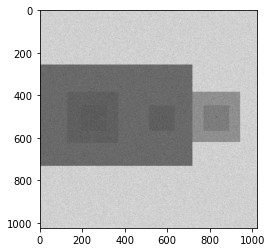

In [153]:
plt.imshow(dImageNoise.T, cmap="gray")
plt.show()

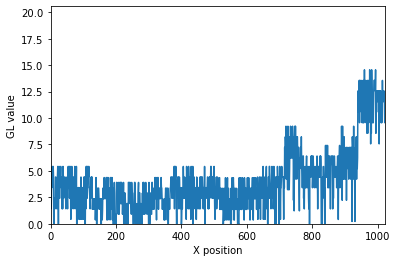

In [154]:
plotLineH(dImageNoise, int(125/f))

EXPERIMENTS

Experiment 1. Microcalcification visualization.

In [155]:
# SOURCE
kVp= 30
I0= 250  
N0, eE= source(kVp, I0)
print(N0, eE)

250 12.0


In [156]:
# OBJECT

size= 256
obj= breast_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_adipose: 2.2720000000000002
coef_breast: 3.1907639999999997
coef_soft: 4.14142


In [157]:
# MICROCALCIFICATION INSERTION
fName= "./coefs/coefAtenuacionCalcium.csv"
mu= getCoef(fName, eE)
sArtifact= 2

pos_1= [63, 125, 125]
obj_microCal= insertArtifact(obj, pos_1, sArtifact, mu)

pos_2= [143, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_2, sArtifact, mu)

pos_3= [207, 125, 125]
obj_microCal= insertArtifact(obj_microCal, pos_3, sArtifact, mu)

In [158]:
# INTERACTION

prj= 'lateral'
qImage= interactor_PR(N0, obj_microCal, prj)

Experiment 1.1. Baseline --> Quantum Image Resolution == Detected Image Resolution

In [159]:
f= 1
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 1.0, 1.0


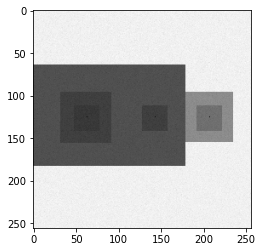

In [160]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

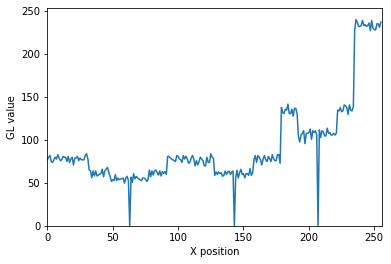

In [161]:
plotLineH(dImage, int(125/f))

Experiment 1.2. Quantum Image Resolution < Detected Image Resolution

In [162]:
# Al no oncluir blur adicional en la funcion del detector, es necesario un detector de tamaño menor
# para obtener un efecto similar al guión de prácticas (que desaparezca la microcalcificación).  
f= 0.35
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 0.25, 0.25


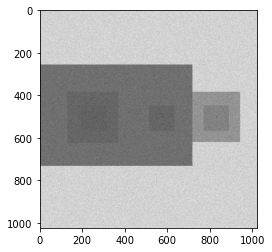

In [163]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

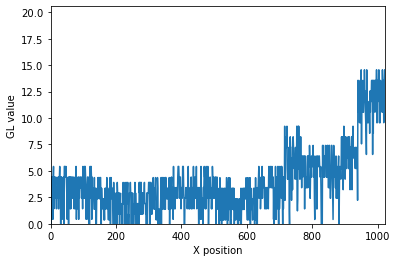

In [164]:
plotLineH(dImage, int(125/f))

Experiment 1.3. Quantum Image Resolution > Detected Image Resolution

In [165]:
f= 4
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 4.0, 4.0


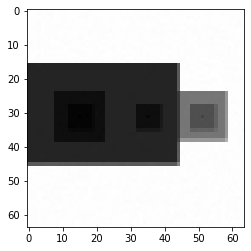

In [166]:
# Explicación de porque no sale blur en todos los bordes (en resumen: porque no lo añadmos artificlamente)

"""
Al agrupar bloques de (factor_x,factor_y) size sumando el número de fotones, es posible que no se tomen píxeles
de dos zonas distintas. Ej:

Imagen entrada:
    1 1 1 1 1 1
    1 1 1 1 1 1
    4 4 4 4 4 4
    4 4 4 4 4 4
    4 4 4 4 4 4 
    1 1 1 1 1 1 
    1 1 1 1 1 1
    1 1 1 1 1 1
Al realizar la agrupación por bloques queda:
    4 4 4 
    8 8 8     
    5 5 5 -> Esto sería blur. Se tomaron píxeles de 2 regiones con distintos valores (la región de 4's y 1's)
    4 4 4

Como vemos, el blur no aparece en todos los bordes, depende de como se agrupen los bloques.
Haciendo la agrupación con step=1 siempre aparecería, pero no se reduciría el tam de la imágen.
"""
plt.imshow(dImage.T, cmap="gray")
plt.show()

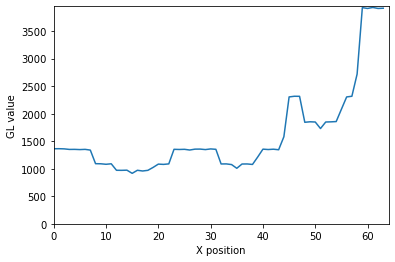

In [167]:
plotLineH(dImage, int(125/f))

Experiment 2. Noise vs Spatial Resolution Analysis.

In [168]:
# SOURCE

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 12.0


In [169]:
# OBJECT

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


In [170]:
# INTERACTION

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

Experiment 2.1. Baseline --> Quantum Image Resolution == Detected Image Resolution

In [171]:
# DETECTION

f= 1
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 1.0, 1.0


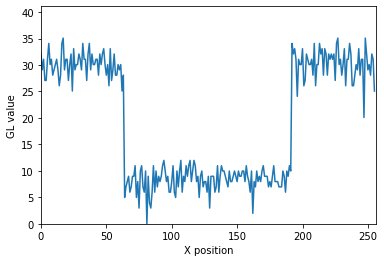

In [172]:
plotLineH(dImage, int(120/f))

In [173]:
# SNR 1

w= 10
snr_1= getSNR(dImage, 128, 128, w)

print(f'SNR 1: {snr_1: .3f}')

SNR 1:  4.765


Experiment 2.2. Quantum Image Resolution < Detected Image Resolution

In [174]:
# DETECTION

f= 0.5
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 0.5, 0.5


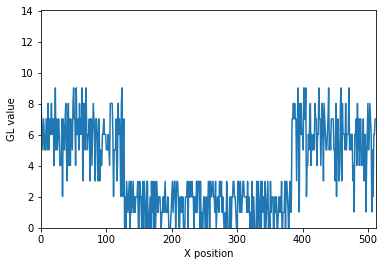

In [175]:
plotLineH(dImage, int(120/f))

In [176]:
# SNR 2

w= 10
snr_2= getSNR(dImage, 256, 256, w)

print(f'SNR 1: {snr_2: .3f}')

SNR 1:  0.870


Experiment 2.3. Quantum Image Resolution > Detected Image Resolution

In [177]:
# DETECTION

f= 4
dImage= detectorNoiseFullP(qImage, int(size/f), int(size/f))

Factores de escalado: 4.0, 4.0


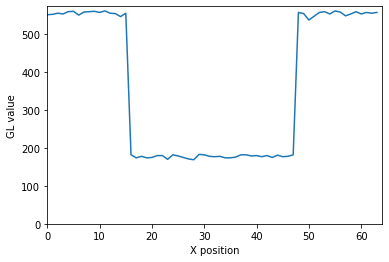

In [178]:
plotLineH(dImage, int(120/f))

In [179]:
# SNR 3
w= 10
snr_3= getSNR(dImage, 32, 32, w)

print(f'SNR 3: {snr_3: .3f}')

SNR 3:  48.486


In [180]:
print(f'SNR 1: {snr_1: .3f}')
print(f'SNR 2: {snr_2: .3f}')
print(f'SNR 3: {snr_3: .3f}')

SNR 1:  4.765
SNR 2:  0.870
SNR 3:  48.486


In [181]:
assert snr_1 > snr_2 and snr_1 < snr_3, "Something wrong happens"